# Computational Social Science Project #3 

*Group number:3

*Group members:Julia Zhu, Xueqin Lin, Peter Soyster, Tyrone Sgambati    

*Semester:* Fall 2022

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import GridSearchCV


# Make sure to import other libraries that will be necessary for training models!

In [2]:
#cd~

In [3]:
#pwd

In [4]:
# Inspections Data 2011 - 2013
chicago_inspections_2011_to_2013 = pd.read_csv("Chicago Inspections 2011-2013.csv"
                                             )

# Inspections Data 2014
chicago_inspections_2014 = pd.read_csv("Chicago Inspections 2014.csv"
                                      )

/var/folders/nm/lnmbr_dn1mg10p4lg3plgt580000gn/T/ipykernel_50421/4275752051.py:2: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  chicago_inspections_2011_to_2013 = pd.read_csv("Chicago Inspections 2011-2013.csv"


In [5]:
# Look at the inspections data from 2011 to 2013
chicago_inspections_2011_to_2013.head()

Inspection_ID Inspection_Date                      DBA_Name  \
0         269961      2013-01-31                    SEVEN STAR   
1         507211      2011-10-18                  PANERA BREAD   
2         507212      2011-10-18      LITTLE QUIAPO RESTAURANT   
3         507216      2011-10-19  SERGIO'S TAQUERIA PIZZA INC.   
4         507219      2011-10-20         TARGET STORE # T-2079   

                   AKA_Name  License  Facility_Type             Risk  \
0                SEVEN STAR    30790  Grocery Store     Risk 3 (Low)   
1              PANERA BREAD  1475890     Restaurant    Risk 1 (High)   
2  LITTLE QUIAPO RESTAURANT  1740130     Restaurant    Risk 1 (High)   
3   SERGIO'S TAQUERIA PIZZA  1447363     Restaurant    Risk 1 (High)   
4                    TARGET  1679459     Restaurant  Risk 2 (Medium)   

                 Address     City State      Zip Inspection_Type Results  \
0       3352 N BROADWAY   CHICAGO    IL  60657.0         Canvass    Pass   
1    6059 N LINCOLN AVE   CHICAGO    IL  60659.0         Canvass    Pass   
2   6259 N MCCORMICK RD   CHICAGO    IL  60659.0         Canvass    Fail   
3  3253 W BRYN MAWR AVE   CHICAGO    IL  60659.0         Canvass    Pass   
4   2112 W PETERSON AVE   CHICAGO    IL  60659.0         Canvass    Fail   

    Latitude  Longitude                                  Location  \
0  41.943359 -87.644999  (41.943359344775146, -87.64499875300952)   
1  41.991919 -87.709631   (41.99191947239194, -87.70963133440333)   
2  41.995632 -87.712707   (41.99563177556418, -87.71270678169132)   
3  41.982933 -87.710982  (41.982933189164974, -87.71098225381141)   
4  41.990729 -87.682979   (41.99072921796059, -87.68297945359863)   

  Facility_Type_Clean  criticalCount  seriousCount  minorCount  pass_flag  \
0               Other              0             0           2          1   
1          Restaurant              0             0           3          1   
2          Restaurant              0             2           6          0   
3          Restaurant              0             0           6          1   
4          Restaurant              0             2           6          0   

   fail_flag  pastFail  pastCritical  pastSerious  pastMinor  timeSinceLast  \
0          0         0             0            0          0            2.0   
1          0         0             0            0          0            2.0   
2          1         0             0            0          0            2.0   
3          0         0             0            0          0            2.0   
4          1         0             0            0          0            2.0   

   firstRecord                ID  LICENSE_ID  ACCOUNT_NUMBER  \
0            1    30790-20110416   2081412.0         63759.0   
1            1  1475890-20110416   2081695.0        207283.0   
2            1  1740130-20110216   2070145.0          3107.0   
3            1  1447363-20110216   2071895.0        270993.0   
4            1  1679459-20100216   2009972.0         15538.0   

                     LEGAL_NAME        DOING_BUSINESS_AS_NAME  \
0            VIRGINIA DELA ROSA                    SEVEN STAR   
1                   PANERA, LLC                  PANERA BREAD   
2                ENELITA GARCIA      LITTLE QUIAPO RESTAURANT   
3  SERGIO'S TAZUERIA PIZZA INC.  SERGIO'S TAQUERIA PIZZA INC.   
4            TARGET CORPORATION         TARGET STORE # T-2079   

                 ADDRESS     CITY STATE  ZIP_CODE  WARD  PRECINCT  \
0    3352 N BROADWAY   1  CHICAGO    IL   60657.0  44.0      33.0   
1  6059 N LINCOLN AVE  C  CHICAGO    IL   60659.0  50.0      23.0   
2    6259 N MCCORMICK RD  CHICAGO    IL   60659.0  50.0      25.0   
3   3253 W BRYN MAWR AVE  CHICAGO    IL   60659.0  39.0      48.0   
4    2112 W PETERSON AVE  CHICAGO    IL   60659.0  40.0      18.0   

  WARD_PRECINCT  POLICE_DISTRICT  LICENSE_CODE        LICENSE_DESCRIPTION  \
0         44-33             19.0        1006.0  Retail Food Establishment   
1         50-23   

In [6]:
# List column names from 2011 to 2013
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [7]:
# Look at the inspection data of 2014
chicago_inspections_2014.head()

Inspection_ID Inspection_Date                    DBA_Name  \
0         920444      2014-01-15  GALLISTEL LANGUAGE ACADEMY   
1         920445      2014-02-03                      SUBWAY   
2         920446      2014-02-03       SHARKS FISH & CHICKEN   
3         920448      2014-03-07              P K PETRO INC.   
4         920449      2014-03-07     Z T DOLLAR EXCHANGE,INC   

                     AKA_Name  License  Facility_Type             Risk  \
0  GALLISTEL LANGUAGE ACADEMY  2046708         School    Risk 1 (High)   
1                      SUBWAY  2183563     Restaurant    Risk 1 (High)   
2       SHARKS FISH & CHICKEN  1477112     Restaurant  Risk 2 (Medium)   
3                    MARATHON  1331469  Grocery Store     Risk 3 (Low)   
4                DOLLAR STORE  2189299  Grocery Store     Risk 3 (Low)   

                    Address     City State      Zip Inspection_Type  \
0         10200 S AVENUE J   CHICAGO    IL  60617.0         Canvass   
1          4025 E 106TH ST   CHICAGO    IL  60617.0         Canvass   
2           2027 E 95TH ST   CHICAGO    IL  60617.0         Canvass   
3  7001 S STONY ISLAND AVE   CHICAGO    IL  60649.0         Canvass   
4           2429 E 72ND ST   CHICAGO    IL  60649.0         Canvass   

    Latitude  Longitude                                 Location  \
0  41.709957 -87.534223   (41.70995714781606, -87.5342225149751)   
1  41.702577 -87.525872  (41.70257660937248, -87.52587169711877)   
2  41.722372 -87.574275  (41.72237211196818, -87.57427469548966)   
3  41.767798 -87.585820  (41.76779762303839, -87.58581991823232)   
4  41.764339 -87.565371  (41.764339216775696, -87.5653706801239)   

  Facility_Type_Clean  criticalCount  seriousCount  minorCount  pass_flag  \
0               Other              0             1           5          0   
1          Restaurant              2             0           0          0   
2          Restaurant              0             0           6          1   
3               Other              0             1           7          0   
4               Other              1             2           5          0   

   fail_flag  pastFail  pastCritical  pastSerious  pastMinor  timeSinceLast  \
0          1         0             0            0          2       0.964384   
1          0         0             0            0          0       0.794521   
2          0         0             0            0          2       0.660274   
3          1         0             0            0          0       2.000000   
4          1         0             0            0          0       2.000000   

   firstRecord                ID  LICENSE_ID  ACCOUNT_NUMBER  \
0            0               NaN         NaN             NaN   
1            0  2183563-20120829   2183563.0        375027.0   
2            0  1477112-20120716   2155150.0        273266.0   
3            1  1331469-20121216   2194284.0        257899.0   
4            1  2189299-20121009   2189299.0        249904.0   

                 LEGAL_NAME     DOING_BUSINESS_AS_NAME  \
0                       NaN                        NaN   
1              AMI SUB INC.                     SUBWAY   
2        A & K SHARKS, INC.      SHARKS FISH & CHICKEN   
3            P K PETRO INC.                Stony Shell   
4  ZT DOLLAR EXCHANGE, INC.  Z T DOLLAR EXCHANGE, INC.   

                   ADDRESS     CITY STATE  ZIP_CODE  WARD  PRECINCT  \
0                      NaN      NaN   NaN       NaN   NaN       NaN   
1        4025 E 106TH ST 1  CHICAGO    IL   60617.0  10.0      38.0   
2           2027 E 95TH ST  CHICAGO    IL   60617.0   7.0      49.0   
3  7001 S STONY ISLAND AVE  CHICAGO    IL   60649.0   5.0      21.0   
4           2429 E 72ND ST  CHICAGO    IL   60649.0   7.0      40.0   

  WARD_PRECINCT  POLICE_DISTRICT  LICENSE_CODE        LICENSE_DESCRIPTION  \
0           NaN              NaN           NaN                        NaN   
1         10-38              4.0        1006.0  Retail Food Establishment   
2      

In [8]:
# List column names 
chicago_inspections_2014.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods', 'outdoor_p

In [9]:
# Compare two sets of data and find the differences between two datasets 
list1=set(chicago_inspections_2011_to_2013)
list2=set(chicago_inspections_2014)
# print("list 1:" + str(list1))
# print("list 2:" + str(list2))

if list1 == list2:
    print("list 1 and list 2 are equal")
else: 
    print("list 1 and list 2 are not equal")

temp3 = [x for x in list1 if x not in list2]
print(temp3)

list 1 and list 2 are not equal
['Results']


In [10]:
# Drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                'Address',
                                                'City',
                                                'State',
                                                'Zip',
                                                'Latitude',
                                                'Longitude',
                                                'Location',
                                                'ID',
                                                'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                'ACCOUNT_NUMBER',
                                                'LEGAL_NAME',
                                                'DOING_BUSINESS_AS_NAME',
                                                'ADDRESS',
                                                'CITY',
                                                'STATE',
                                                'ZIP_CODE',
                                                'WARD',
                                                'PRECINCT',
                                                'LICENSE_CODE',
                                                'BUSINESS_ACTIVITY_ID',
                                                'BUSINESS_ACTIVITY',
                                                'LICENSE_NUMBER',
                                                'LATITUDE',
                                                'LONGITUDE',
                                                'pass_flag',
                                                'fail_flag'],
                                     inplace = True)

chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [11]:
# Drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome (chicago_inspections_2014)
chicago_inspections_2014.drop(columns = ['AKA_Name', 
                                                 'License',
                                                'Address',
                                                'City',
                                                'State',
                                                'Zip',
                                                'Latitude',
                                                'Longitude',
                                                'Location',
                                                'ID',
                                                'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                'ACCOUNT_NUMBER',
                                                'LEGAL_NAME',
                                                'DOING_BUSINESS_AS_NAME',
                                                'ADDRESS',
                                                'CITY',
                                                'STATE',
                                                'ZIP_CODE',
                                                'WARD',
                                                'PRECINCT',
                                                'LICENSE_CODE',
                                                'BUSINESS_ACTIVITY_ID',
                                                'BUSINESS_ACTIVITY',
                                                'LICENSE_NUMBER',
                                                'LATITUDE',
                                                'LONGITUDE',
                                                'pass_flag',
                                                'fail_flag'],
                                     inplace = True)

chicago_inspections_2014.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [12]:
# Convert the Inspection Date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'], infer_datetime_format=True)  
chicago_inspections_2014['Inspection_Date'] = pd.to_datetime(chicago_inspections_2014['Inspection_Date'], infer_datetime_format=True)

In [13]:
chicago_inspections_2011_to_2013

Inspection_Date  \
Inspection_ID DBA_Name                                                   
269961        SEVEN STAR                                    2013-01-31   
507211        PANERA BREAD                                  2011-10-18   
507212        LITTLE QUIAPO RESTAURANT                      2011-10-18   
507216        SERGIO'S TAQUERIA PIZZA INC.                  2011-10-19   
507219        TARGET STORE # T-2079                         2011-10-20   
...                                                                ...   
1393258       CIAO BELLA CAFE                               2013-12-17   
1395218       Christian Fields Style  Bar                   2013-12-31   
1395224       W CHICAGO - LAKESHORE                         2013-12-31   
1441493       ADVOCATE ILLINOIS MASONIC MEDICAL CENTER      2012-05-18   
1493801       SODEXHO                                       2013-02-13   

                                                        Facility_Type  \
Inspection_ID DBA_Name                                                  
269961        SEVEN STAR                                Grocery Store   
507211        PANERA BREAD                                 Restaurant   
507212        LITTLE QUIAPO RESTAURANT                     Restaurant   
507216        SERGIO'S TAQUERIA PIZZA INC.                 Restaurant   
507219        TARGET STORE # T-2079                        Restaurant   
...                                                               ...   
1393258       CIAO BELLA CAFE                              Restaurant   
1395218       Christian Fields Style  Bar                  Restaurant   
1395224       W CHICAGO - LAKESHORE                        Restaurant   
1441493       ADVOCATE ILLINOIS MASONIC MEDICAL CENTER     Restaurant   
1493801       SODEXHO                                      Restaurant   

                                                                   Risk  \
Inspection_ID DBA_Name                                                    
269961        SEVEN STAR                                   Risk 3 (Low)   
507211        PANERA BREAD                                Risk 1 (High)   
507212        LITTLE QUIAPO RESTAURANT                    Risk 1 (High)   
507216        SERGIO'S TAQUERIA PIZZA INC.                Risk 1 (High)   
507219        TARGET STORE # T-2079                     Risk 2 (Medium)   
...                                                                 ...   
1393258       CIAO BELLA CAFE                             Risk 1 (High)   
1395218       Christian Fields Style  Bar               Risk 2 (Medium)   
1395224       W CHICAGO - LAKESHORE                       Risk 1 (High)   
1441493       ADVOCATE ILLINOIS MASONIC MEDICAL CENTER    Risk 1 (High)   
1493801       SODEXHO                                     Risk 1 (High)   

                                                       Inspection_Type  \
Inspection_ID DBA_Name                                                   
269961        SEVEN STAR                                       Canvass   
507211        PANERA BREAD                                     Canvass   
507212        LITTLE QUIAPO RESTAURANT                         Canvass   
507216        SERGIO'S TAQUERIA PIZZA INC.                     Canvass   
507219        TARGET STORE # T-2079                            Canvass   
...                                                                ...   
1393258       CIAO BELLA CAFE                                  Canvass   
1395218       Christian Fields Style  Bar                      Canvass   
1395224       W CHICAGO - LAKESHORE                            Canvass   
1441493       ADVOCATE ILLINOIS MASONIC MEDICAL CENTER         Canvass   
1493801       SODEXHO                                          Canvass   

                                                                   Results  \
Inspection_ID DBA_Name                                                       
269961        SEVEN STAR                       

In [14]:
chicago_inspections_2014

Inspection_Date  \
Inspection_ID DBA_Name                                               
920444        GALLISTEL LANGUAGE ACADEMY                2014-01-15   
920445        SUBWAY                                    2014-02-03   
920446        SHARKS FISH & CHICKEN                     2014-02-03   
920448        P K PETRO INC.                            2014-03-07   
920449        Z T DOLLAR EXCHANGE,INC                   2014-03-07   
...                                                            ...   
1506245       TORTILLA SOUP                             2014-10-30   
1506247       GROTA RESTAURANT                          2014-10-31   
1508206       CHICAGO INTERNATIONAL CHARTER SCHOOL      2014-10-27   
1508207       R U HUNGRY?                               2014-10-27   
1513208       EL RANCHITO FOOD                          2014-10-31   

                                                    Facility_Type  \
Inspection_ID DBA_Name                                              
920444        GALLISTEL LANGUAGE ACADEMY                   School   
920445        SUBWAY                                   Restaurant   
920446        SHARKS FISH & CHICKEN                    Restaurant   
920448        P K PETRO INC.                        Grocery Store   
920449        Z T DOLLAR EXCHANGE,INC               Grocery Store   
...                                                           ...   
1506245       TORTILLA SOUP                            Restaurant   
1506247       GROTA RESTAURANT                         Restaurant   
1508206       CHICAGO INTERNATIONAL CHARTER SCHOOL         School   
1508207       R U HUNGRY?                              Restaurant   
1513208       EL RANCHITO FOOD                      Grocery Store   

                                                               Risk  \
Inspection_ID DBA_Name                                                
920444        GALLISTEL LANGUAGE ACADEMY              Risk 1 (High)   
920445        SUBWAY                                  Risk 1 (High)   
920446        SHARKS FISH & CHICKEN                 Risk 2 (Medium)   
920448        P K PETRO INC.                           Risk 3 (Low)   
920449        Z T DOLLAR EXCHANGE,INC                  Risk 3 (Low)   
...                                                             ...   
1506245       TORTILLA SOUP                           Risk 1 (High)   
1506247       GROTA RESTAURANT                        Risk 1 (High)   
1508206       CHICAGO INTERNATIONAL CHARTER SCHOOL    Risk 1 (High)   
1508207       R U HUNGRY?                             Risk 1 (High)   
1513208       EL RANCHITO FOOD                      Risk 2 (Medium)   

                                                   Inspection_Type  \
Inspection_ID DBA_Name                                               
920444        GALLISTEL LANGUAGE ACADEMY                   Canvass   
920445        SUBWAY                                       Canvass   
920446        SHARKS FISH & CHICKEN                        Canvass   
920448        P K PETRO INC.                               Canvass   
920449        Z T DOLLAR EXCHANGE,INC                      Canvass   
...                                                            ...   
1506245       TORTILLA SOUP                                Canvass   
1506247       GROTA RESTAURANT                             Canvass   
1508206       CHICAGO INTERNATIONAL CHARTER SCHOOL         Canvass   
1508207       R U HUNGRY?                                  Canvass   
1513208       EL RANCHITO FOOD                             Canvass   

                                                   Facility_Type_Clean  \
Inspection_ID DBA_Name                                                   
920444        GALLISTEL LANGUAGE ACADEMY                         Other   
920445        SUBWAY                                        Restaurant   
920446        SHARKS FISH & CHICKEN                         Restaurant   
920448        P K PETRO INC.         

## Visualization (Xueqin)

What do inspections look like over time?

Between 2011 and 2013, most inspections were conducted in May 2013 and least inspections were done in July 2012. In 2014, inspections increased from January to March, but decreased in April, and then the inspections followed a linear growth from April to October.

<AxesSubplot:title={'center':'Inspections by Month and Year'}, xlabel='Inspection_MonthYear'>

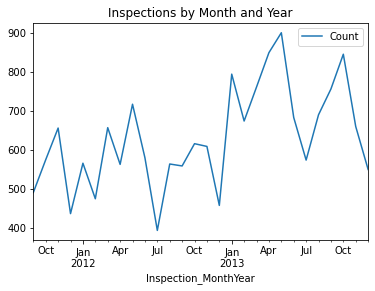

In [15]:
# Visualize Inspections Over Time between 2011 and 2013
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year") 

<AxesSubplot:title={'center':'Inspections by Month and Year in 2014'}, xlabel='Inspection_MonthYear'>

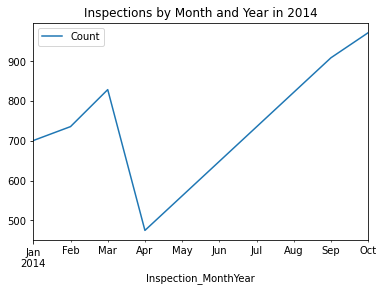

In [16]:
# Visualize Inspections Over Time for chicago_inspections_2014
chicago_inspections_2014['Inspection_MonthYear'] = chicago_inspections_2014['Inspection_Date'].dt.to_period('M')
counts_by_day_2014 = chicago_inspections_2014.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day_2014.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day_2014.plot(title = "Inspections by Month and Year in 2014") 

What do the results look like? 

Approximately 12,000 facilities passed the inspection, around 3500 failed the inspections, and about 2000 passed with conditions.

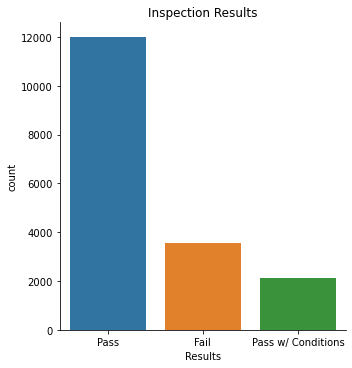

In [17]:
# Inspection Results
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

[link text](https://)What if we separate by facility type?

Compared to other facility type, restaurants have higher rate of passing, failing, and passing with conditions in the inspections done between 2011 and 2013. Specifically, about 8000 restaurants passed the inspection whereas about 4000 other facility passed the inspection. 

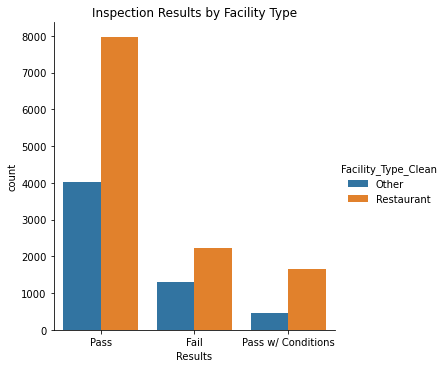

In [18]:
# Inspection Results by Facility Type (Restaurant or Not)
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count",
           hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show()

## Preprocess Data (Xueqin)

In [19]:
# Drop datetime info
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                      'minDate',
                                      'maxDate',
                                      'Inspection_MonthYear'],
                                      axis = 1)

chicago_inspections_2014 = chicago_inspections_2014.dropna().drop(['Inspection_Date',
                                      'minDate',
                                      'maxDate',
                                      'Inspection_MonthYear'],
                                      axis = 1)

In [20]:
# Set target variable. 
y = chicago_inspections_2011_to_2013['Results']
## Comment out the following code if you don't want to binarize the target variable
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)
# Recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)

# All other features in X
X = chicago_inspections_2011_to_2013.drop(columns = ['Results'])
X = pd.get_dummies(X)

In [21]:
X.head()

criticalCount  seriousCount  \
Inspection_ID DBA_Name                                                    
269961        SEVEN STAR                                0             0   
507211        PANERA BREAD                              0             0   
507212        LITTLE QUIAPO RESTAURANT                  0             2   
507216        SERGIO'S TAQUERIA PIZZA INC.              0             0   
507219        TARGET STORE # T-2079                     0             2   

                                            minorCount  pastFail  \
Inspection_ID DBA_Name                                             
269961        SEVEN STAR                             2         0   
507211        PANERA BREAD                           3         0   
507212        LITTLE QUIAPO RESTAURANT               6         0   
507216        SERGIO'S TAQUERIA PIZZA INC.           6         0   
507219        TARGET STORE # T-2079                  6         0   

                                            pastCritical  pastSerious  \
Inspection_ID DBA_Name                                                  
269961        SEVEN STAR                               0            0   
507211        PANERA BREAD                             0            0   
507212        LITTLE QUIAPO RESTAURANT                 0            0   
507216        SERGIO'S TAQUERIA PIZZA INC.             0            0   
507219        TARGET STORE # T-2079                    0            0   

                                            pastMinor  timeSinceLast  \
Inspection_ID DBA_Name                                                 
269961        SEVEN STAR                            0            2.0   
507211        PANERA BREAD                          0            2.0   
507212        LITTLE QUIAPO RESTAURANT              0            2.0   
507216        SERGIO'S TAQUERIA PIZZA INC.          0            2.0   
507219        TARGET STORE # T-2079                 0            2.0   

                                            firstRecord  POLICE_DISTRICT  \
Inspection_ID DBA_Name                                                     
269961        SEVEN STAR                              1             19.0   
507211        PANERA BREAD                            1             24.0   
507212        LITTLE QUIAPO RESTAURANT                1             17.0   
507216        SERGIO'S TAQUERIA PIZZA INC.            1             17.0   
507219        TARGET STORE # T-2079                   1             24.0   

                                            ageAtInspection  \
Inspection_ID DBA_Name                                        
269961        SEVEN STAR                          10.964384   
507211        PANERA BREAD                         7.457534   
507212        LITTLE QUIAPO RESTAURANT             4.578082   
507216        SERGIO'S TAQUERIA PIZZA INC.         7.805479   
507219        TARGET STORE # T-2079                5.290411   

                                            consumption_on_premises_incidental_activity  \
Inspection_ID DBA_Name                                                                    
269961        SEVEN STAR                                                              0   
507211        PANERA BREAD                                                            0   
507212        LITTLE QUIAPO RESTAURANT                                                0   
507216        SERGIO'S TAQUERIA PIZZA INC.                                            0   
507219        TARGET STORE # T-2079                                                   0   

                                            tobacco  package_goods  \
Inspection_ID DBA_Name                                               
269961        SEVEN STAR                          1              0   
507211        PANERA BREAD                        0              0   
507212        LITTLE QUIAPO RESTAURANT            0              0   
507216        SERGIO'S TAQUERIA PIZZA INC.        0          

In [22]:
y

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

## Fit Models

## Model 1: Decision Tree (Julia Zhu)

Be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using train/validation splits or cross-validation)

### Logics of decision tree 

Decision tree models can be used in both regression and classification prediction. In classification, decison tree models find the best split points for features and divide the instances into two groups at each node by adding one more split if the new split can reduce inpurity in the subgroups. The advantages of using decision tree is that both numeric and nominal features can be used and that by visualizing decision trees, the standards used in classification can be easily explained. Furthermore, since both numeric and nominal features work well with decision tree, it doesn't require much data-preprocessing or normalization work. However, there are also disadvantages in using decision trees because it can be more time-consuming and more complex than other algorithms. 

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore')
from sklearn import preprocessing, tree
import matplotlib.pyplot as plt

In [24]:
#split data into train and validate (pdf instruction says no test set)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = .80, test_size=0.20,
                                                   stratify=y)

In [25]:
# one decision tree model
clff = DecisionTreeClassifier(max_depth=3)
clff = clff.fit(X_train, y_train)
y_pred = clff.predict(X_val)
print("accuracy score of decison tree:", accuracy_score(y_val, y_pred))
print("recall of decison tree:", recall_score(y_val, y_pred))
print("precision of decison tree:", precision_score(y_val, y_pred))
print("F1 score of decison tree:", f1_score(y_val, y_pred))

accuracy score of decison tree: 0.9232778321906627
recall of decison tree: 0.9563106796116505
precision of decison tree: 0.7396745932415519
F1 score of decison tree: 0.8341566690190543


In [26]:
# tune parameters with the default metric 
tree_param = [{'criterion': ['entropy', 'gini'], 'max_depth': np.arange(2, 10)}
              ]
dtree_gscv = GridSearchCV(clff, tree_param, cv=5)
dtree_gscv.fit(X_train, y_train)
best_dtree_pred = dtree_gscv.best_estimator_.predict(X_val)

print("accuracy score of decison tree:", accuracy_score(y_val, best_dtree_pred))
print("recall of decison tree:", recall_score(y_val, best_dtree_pred))
print("precision of decison tree:", precision_score(y_val, best_dtree_pred))
print("F1 score of decison tree:", f1_score(y_val, best_dtree_pred))
print("best parameters for decision tree:", dtree_gscv.best_params_)

accuracy score of decison tree: 0.9258896506692785
recall of decison tree: 0.9239482200647249
precision of decison tree: 0.7603195739014648
F1 score of decison tree: 0.8341855368882396
best parameters for decision tree: {'criterion': 'gini', 'max_depth': 6}


### Question: which metrics should we use? 

We should use F1 score, because the data set is unbalanced. As seen from the descriptive analysis, there are much more "pass" results than "fail" results. The F1-score combines the precision and recall of a classifier into a single metric by taking their harmonic mean. In this way, F1-score not only combines precision and recall but also handles unbalnaced dataset better.

When we create a classifier, oftentimes we need to make a compromise between the recall and precision, it is kind of hard to compare a model with high recall and low precision versus a model with high precision but low recall. As shown as the different trees above, the tree with highest recall score won't necessarily have highest precision score and vice versa. A model with high recall but low precision score returns many positive results, but most of its predicted labels are incorrect when compared to the ground truth. On the other hand, a model with high precision but low recall score returns very few results, but most of its predicted labels are correct when compared to the ground-truth. An ideal scenario would be a model with high precision and high recall, meaning it will return many results, with all results labelled correctly. Unfortunately, in most cases, precision and recall are often in tension. That is, improving precision typically reduces recall and vice versa.
F1-score merges these two metrics into a single measure that we can use to compare two models and can usually work better in an imbalanced classification problem.

In [27]:
#tune parameters with F1-score as metric
tree_param = [{'criterion': ['entropy', 'gini'], 'max_depth': np.arange(2, 10)}
              ]
dtree_gscv2 = GridSearchCV(clff, tree_param, cv=5, scoring = "f1")
dtree_gscv2.fit(X_train, y_train)
best_dtree_pred2 = dtree_gscv2.best_estimator_.predict(X_val)

print("accuracy score of decison tree:", accuracy_score(y_val, best_dtree_pred2))
print("recall of decison tree:", recall_score(y_val, best_dtree_pred2))
print("precision of decison tree:", precision_score(y_val, best_dtree_pred2))
print("F1 score of decison tree:", f1_score(y_val, best_dtree_pred2))
print("best parameters for decision tree:", dtree_gscv.best_params_)

accuracy score of decison tree: 0.9258896506692785
recall of decison tree: 0.9223300970873787
precision of decison tree: 0.7610146862483311
F1 score of decison tree: 0.8339429407461596
best parameters for decision tree: {'criterion': 'gini', 'max_depth': 6}


In [28]:
# cross_val_score (f1 score) for the best tree model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dtree_gscv2.best_estimator_, X, y, cv=5,scoring = "f1")

In [29]:
scores

array([0.8200313 , 0.81190995, 0.80818802, 0.83294842, 0.81866871])

In [30]:
# Take the mean score from the results of cross validation
scores.mean()

0.8183492796246148

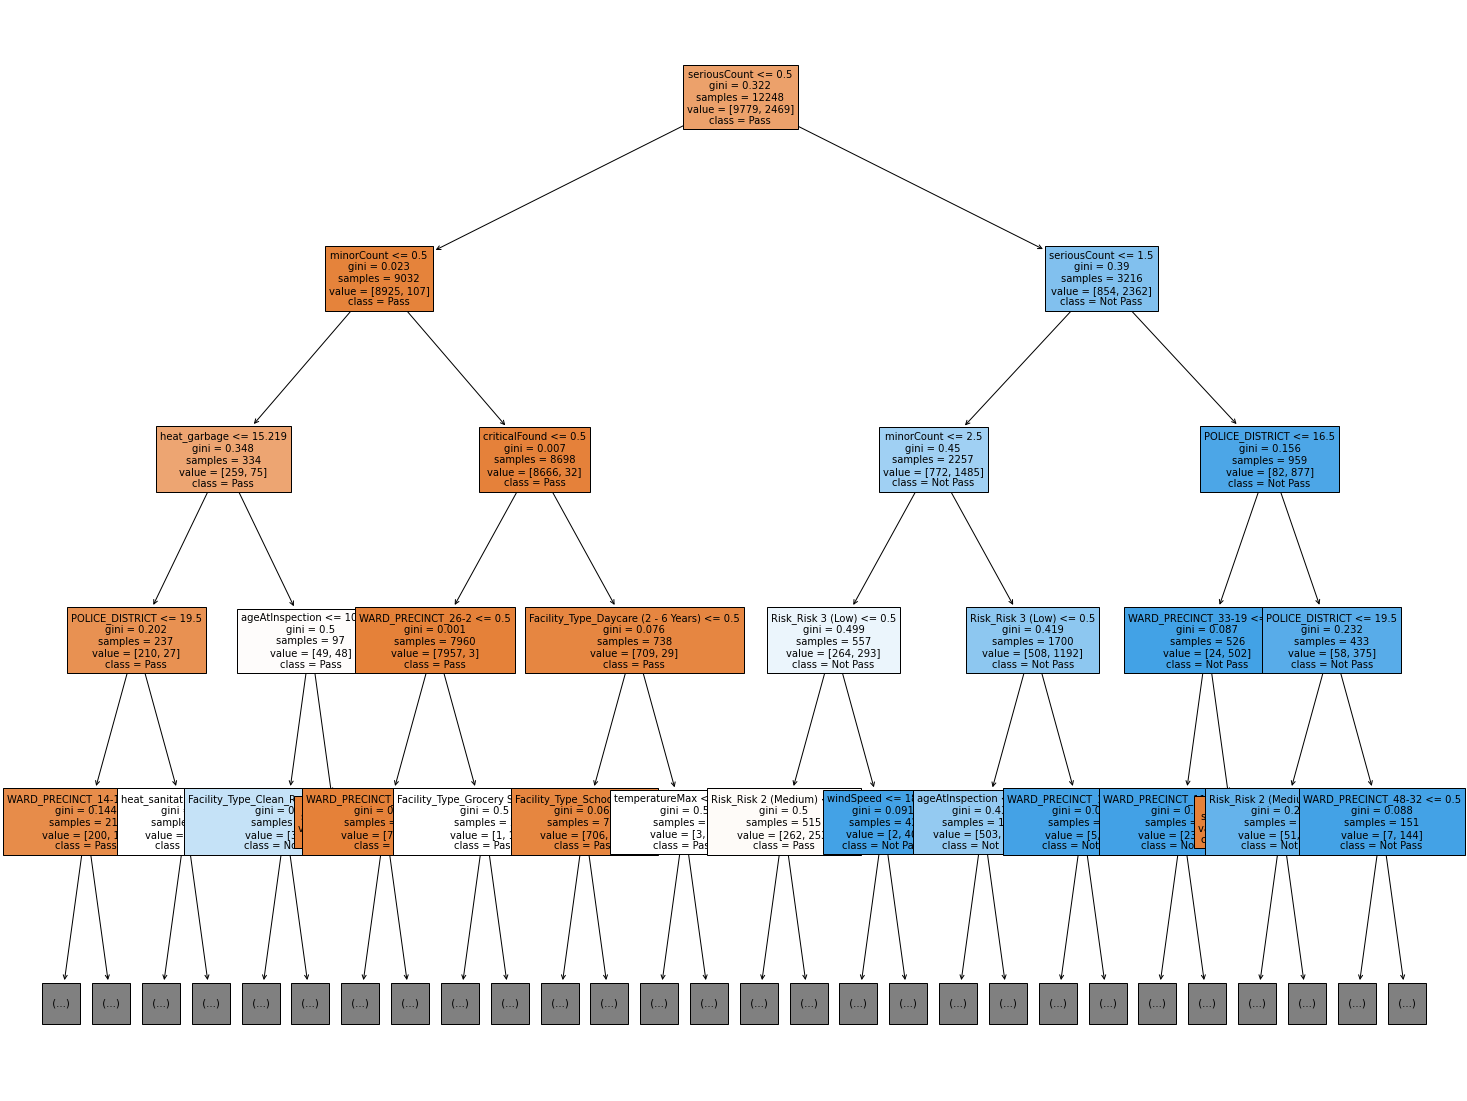

In [31]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree_gscv2.best_estimator_, 
                   feature_names=X.columns,  
                   class_names=["Pass", "Not Pass"],
                   filled=True,
                  fontsize = 10,
                  max_depth = 4)

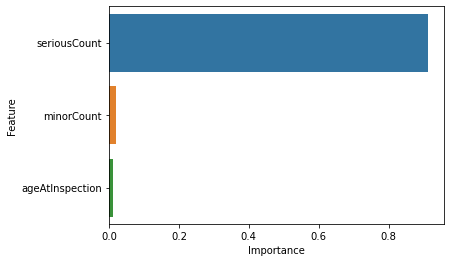

In [32]:
# filter features based on feature importance
feat_importances = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(dtree_gscv2.best_estimator_.feature_importances_))], axis = 1)
feat_importances.columns = ["Feature", "Importance"]
sns.barplot(x = "Importance", y = "Feature", data = feat_importances.nlargest(3, 'Importance'))
plt.show()

In [33]:
# refit the tree using only top 3 features

important_features = feat_importances.nlargest(3, 'Importance')['Feature']
X_reduced = X[X.columns[X.columns.isin(important_features)]]
X_trainR, X_valR, y_trainR, y_valR = train_test_split(X_reduced, y, train_size = .80, test_size=0.20,
                                                   stratify=y)

dtree_gscv3 = GridSearchCV(clff, tree_param, cv=5, scoring = "f1")
dtree_gscv3.fit(X_trainR, y_trainR)
best_dtree_pred3 = dtree_gscv3.best_estimator_.predict(X_valR)

print("F1 score of decison tree:", f1_score(y_valR, best_dtree_pred3))
scores2 = cross_val_score(dtree_gscv3.best_estimator_, X_reduced, y, cv=5,scoring = "f1")
scores2

F1 score of decison tree: 0.8295059151009047


array([0.82525698, 0.82223747, 0.81320225, 0.84750527, 0.84958217])

In [34]:
scores2.mean()

0.8315568279494039

## Model 2 - Neural Network (Tyrone)

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Sklearn
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


In [36]:
from sklearn.model_selection import train_test_split
# X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = .80, test_size=0.20,
#                                                    stratify=y)

scaler = StandardScaler() # initialize standard scaler
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.fit_transform(X_val)

print(X_train_scaled)

[[-0.34631035 -0.52710424  0.13356687 ... -0.04871707 -0.37937387
   0.38568456]
 [-0.34631035 -0.52710424 -0.86031345 ... -0.04871707 -0.37937387
   0.38568456]
 [-0.34631035 -0.52710424 -0.86031345 ... -0.04871707 -0.37937387
   0.38568456]
 ...
 [12.25609386  0.94216584  2.1213275  ... -0.04871707  2.63592216
  -2.59279242]
 [-0.34631035 -0.52710424  2.1213275  ... -0.04871707 -0.37937387
   0.38568456]
 [-0.34631035  0.94216584  1.12744718 ... -0.04871707 -0.37937387
   0.38568456]]


*Building* Neural Network

In [37]:
mlp = MLPClassifier(hidden_layer_sizes=(), 
                    activation= 'relu', 
                    max_iter = 10000)

# Train the classifier with the traning data
mlp.fit(X_train_scaled, y_train.ravel())

# predict results from the test data
predicted = mlp.predict(X_val_scaled)

print("accuracy score of MLP:", accuracy_score(y_val, predicted))
print("recall of  MLP:", recall_score(y_val, predicted))
print("precision of  MLP:", precision_score(y_val, predicted))
print("F1 score of  MLP:", f1_score(y_val, predicted))

accuracy score of MLP: 0.8991185112634672
recall of  MLP: 0.8074433656957929
precision of  MLP: 0.7242380261248186
F1 score of  MLP: 0.7635807192042846


Tuning 1 - lbfgs solver (best!)

In [38]:
mlp_best = MLPClassifier(hidden_layer_sizes=(), 
                    activation= 'relu',
                    solver = 'lbfgs',
                    max_iter = 10000)

# Train the classifier with the traning data
mlp_best.fit(X_train_scaled, y_train.ravel())

# predict results from the test data
predicted_best = mlp_best.predict(X_val_scaled)

print("accuracy score of MLP:", accuracy_score(y_val, predicted_best))
print("recall of  MLP:", recall_score(y_val, predicted_best))
print("precision of  MLP:", precision_score(y_val, predicted_best))
print("F1 score of  MLP:", f1_score(y_val, predicted_best))

accuracy score of MLP: 0.9056480574600065
recall of  MLP: 0.7087378640776699
precision of  MLP: 0.8007312614259597
F1 score of  MLP: 0.7519313304721029


Tuning 2 - 3 hidden layers with 10 neurons (worse)

In [39]:
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), 
                    activation= 'relu', 
                    solver = 'lbfgs',
                    max_iter = 10000)

# Train the classifier with the traning data
mlp.fit(X_train_scaled, y_train.ravel())

# predict results from the test data
predicted = mlp.predict(X_val_scaled)

print("accuracy score of MLP:", accuracy_score(y_val, predicted))
print("recall of  MLP:", recall_score(y_val, predicted))
print("precision of  MLP:", precision_score(y_val, predicted))
print("F1 score of  MLP:", f1_score(y_val, predicted))

accuracy score of MLP: 0.8847535096310807
recall of  MLP: 0.7216828478964401
precision of  MLP: 0.7113237639553429
F1 score of  MLP: 0.7164658634538152


Tuning 3 - 3 hidden layers with 100 neurons (worse)

In [40]:
mlp = MLPClassifier(hidden_layer_sizes=(100,100,100), 
                    activation= 'relu',
                    solver = 'lbfgs',
                    max_iter = 10000)

# Train the classifier with the traning data
mlp.fit(X_train_scaled, y_train.ravel())

# predict results from the test data
predicted = mlp.predict(X_val_scaled)

print("accuracy score of MLP:", accuracy_score(y_val, predicted))
print("recall of  MLP:", recall_score(y_val, predicted))
print("precision of  MLP:", precision_score(y_val, predicted))
print("F1 score of  MLP:", f1_score(y_val, predicted))

accuracy score of MLP: 0.8974861247143323
recall of  MLP: 0.7734627831715211
precision of  MLP: 0.7331288343558282
F1 score of  MLP: 0.752755905511811


Confusion Matrix

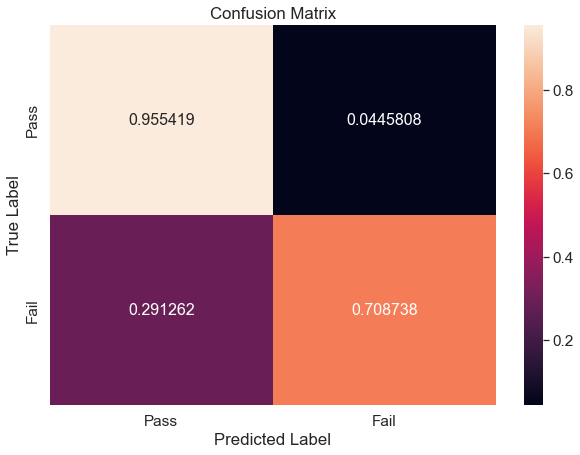

In [41]:
cf = confusion_matrix(y_val,predicted_best, normalize = "true")

df_cm = pd.DataFrame(cf, range(2), range(2))

df_cm = df_cm.rename(index=str, columns={0: "Pass", 1: "Fail"})
df_cm.index = ["Pass", "Fail"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Multilayered neural networks consist of three classes of layers with the following structure: An input layer (which contains a neuron for each feature in the model), hidden layers (the number of layers and number of neurons per layer can vary), an output layer (which contains a neuron for each level of the desire categorical outcome). The number of hidden layers and the neurons they contain are important hyper-parameters that can be optimized to influence model performance. The basic intuition is that each hidden layer identifies latent properties from the outputs of previous layers (be it the input layer or another hidden layer). This layer-by-layer architecture allows  networks with many hidden layers to detect very specific and complex features, like the presence of a wheel in a picture, that could not be detected directly from pixels alone. In a categorical prediction problem like this one, a softmax activation is applied to the output from the final hidden layer to produce class probabilities. The classification itself is simply the class with the highest probability. 

Neural networks are extremely flexible and can make use of huge numbers of complex latent features (as are found in video and images) in prediction tasks. However, what neural networks offer in flexibility they sacrifice in interpretability and computational cost. Similarly, there are a large number of tunable hyper-parameters (layer numbers, layer size, solver, activation functions) which offers flexibility but also makes tuning more resource intensive.  

A neural network is a plausible (but probably not optimal) algorithm in this situation. A priori, it appears that given the well-specified nature of the feautures (e.g., city, liquor license,  etc.) the massive flexibility of a neural network will not be necessary. However, a simple neural network is perfectly capable of processing inputs like this and making classifications. It remains an empirical question whether there are latent variables embedded in the feature space that will benefit from several hidden layers. 


<!-- I would argue that in this context precision is the best metric to optimize for. Although precision's focus solely on detecting positive cases (in this case Failures) can be problematic in some cases, accurately detecting businesses who pose a risk to public safety is the primary focus of this classifcation task. By optimizing for precision we risk systematically falsely categorizing businesses who should pass as "Failed", which may be costly to business owners but allows us to optimize for public safety. Practically, a business in this position could appeal their decision.  -->

## Model 3: Peter: Support Vector Machines

We use support vector classifier, as an extension of maximal margin classifier in cases where no perfect plane that separates two classes exists, in order to divide a multi dimensional space with a plane such that most labels are on the correct side of the plane according to their class. Because support vector classifier uses soft margins, it has greater robustness to individual observation at a cost of accurate classification of most training observations (less variance at a cost of small increase in bias). Support vector classifier hence also has low sensitivity to outliers. Support vector machines also allow for non-linear boundaries between classes, by enlargind the feature space or converting linear classifier into non-linear ones. As shown below, the result of grid search suggests a support vector classifier with a non-linear kernel. On the other hand, support vector machines are only suitable for prediction problems with two classes. If we had not reduced the number of classes in our labe

In [42]:
# creating the model
from sklearn.svm import SVC
svm = SVC()

# fitting the model
svm_model = svm.fit(X_train, y_train.ravel())

In [43]:
#NOTE: Due to lenghty run time of the hyperparameter search grid, I have commented out the code, 
#so the notebook will run faster
#hyperparameter tuning with gridsearch
# param_grid = {'C': [1, 10], 
#              'kernel': ['linear'], 
#              'gamma': ('scale', 'auto')}
# svm_grid = GridSearchCV(svm_model, param_grid, cv=3)
# svm_grid.fit(X_train, y_train.ravel())

# best_svm_index = np.argmax(svm_grid.cv_results_["mean_test_score"])
# best_svm_pred = svm_grid.best_estimator_.predict(X_val)

#print(svm_grid.best_params_)
#print("Support Vector Machine had", accuracy_score(best_svm_pred, y_validate), 'validation accuracy')
print("The best hyperparameters for the svm classifier are 'C': 10, 'gamma': 'auto', 'kernel': 'poly'")
print("Support Vector Machine had 0.9226248775710089 validation accuracy")
best_svm = SVC(C= 10, gamma= 'auto', kernel= 'poly')

The best hyperparameters for the svm classifier are 'C': 10, 'gamma': 'auto', 'kernel': 'poly'
Support Vector Machine had 0.9226248775710089 validation accuracy


In [44]:
# fit best model on our data
# this will be the model that is used for visualization and ensemble learning in the next sections
# svm_model_best = svm_grid.best_estimator_.fit(X_train, y_train.ravel())
#for now:
svm_model_best = best_svm.fit(X_train, y_train.ravel())

## Validation Metrics

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

In [50]:
#Peter comment
#I hard coded the svm_model_best model to have the selected hyperparameters 


In [52]:
#same as above, this cell takes a VERY long time to run, so it is commented out. 
#The following cell prints the results of this cross validation

# from sklearn.model_selection import cross_val_score
# #Julia comment: adding other two models in the list
# models = [dtree_gscv3.best_estimator_,svm_model_best,mlp 
#        ]

# for m in models:
#    print("\n", m)
#    print("Accuracy: ", cross_val_score(m, X, y, cv=5, scoring = "accuracy").mean())
#    print("Precision: ", cross_val_score(m, X, y, cv=5, scoring = "precision").mean())
#    print("Recall: ", cross_val_score(m, X, y, cv=5, scoring = "recall").mean())
#    print("F1: ", cross_val_score(m, X, y, cv=5, scoring = "f1").mean())

In [45]:
print("SVC(C=10, gamma='auto', kernel='poly')", )
print("Accuracy:  0.9180331480025495")
print("Precision:  0.7629714782156897")
print("Recall:  0.8630039915448485")
print("F1:  0.8090465322630337")

SVC(C=10, gamma='auto', kernel='poly')
Accuracy:  0.9180331480025495
Precision:  0.7629714782156897
Recall:  0.8630039915448485
F1:  0.8090465322630337


## Policy Simulation (Xueqin)

### Interpretable Machine Learning

**Hint**: Use tools like feature importance plots and coefficient plots

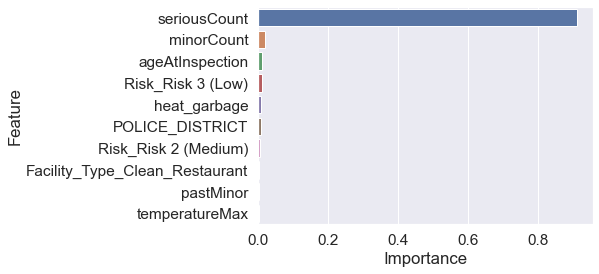

In [46]:
# filter features based on feature importance of decision tree model
feat_importances = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(dtree_gscv2.best_estimator_.feature_importances_))], axis = 1)
feat_importances.columns = ["Feature", "Importance"]
sns.barplot(x = "Importance", y = "Feature", data = feat_importances.nlargest(10, 'Importance'))
plt.show()

In [49]:
print(feat_importances.nlargest(10,'Importance'))

                            Feature  Importance
1                      seriousCount    0.911838
2                        minorCount    0.020304
10                  ageAtInspection    0.012182
201               Risk_Risk 3 (Low)    0.010342
28                     heat_garbage    0.008744
9                   POLICE_DISTRICT    0.007525
200            Risk_Risk 2 (Medium)    0.005436
204  Facility_Type_Clean_Restaurant    0.002420
6                         pastMinor    0.002201
24                   temperatureMax    0.002048


## Feature Importance for the SVM Model

For the SVM model, we found that the SVC model with polynomial kernel performs best with data. Because feature coefficiency is only available with linear kernel, feature importance selection can be very difficult when dealing with non-linear SVM models. It is out of our scope of this project, and thus feature importance of SVM is not performed. 

## Filter features based on feature importance for the neural network model


The black box nature is a most disadvantage of the neural network model. As neural network model has hidden layers and neurons that contain hyper-parameters that can influence model performance, it is very challenging to identify the importance of features that determine the performance of model. It is out of our scope for this course project. Therefore, the feature importance plot is not performed.

## Prioritize Audits (Xueqin)

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1000 observations at random

1. We trained three models that include decision tree model, neural network model, and support vector machine (SVM) model. The following presents with results of metrics for these three models: 

Decision tree model: 

accuracy score of decison tree: 0.925563173359451

recall of decison tree: 0.9692556634304207

precision of decison tree: 0.7413366336633663

F1 score of decison tree: 0.8401122019635344

Neural Network model:

accuracy score of MLP: 0.8987920339536403

recall of decison MLP: 0.6747572815533981

precision of decison MLP: 0.7927756653992395

F1 score of decison MLP: 0.7290209790209791

SVM model: 

Accuracy score of SVM:  0.9180331480025495

Precision score of SVM:  0.7629714782156897

Recall score of SVM:  0.8630039915448485

F1 score of SVM:  0.8090465322630337

While neural network model outperforms the other two based on the precision metrics, F1 score of decision tree model is best among these three models. Decision tree model also outperforms the other two models based on recall and accuracy scores. Therefore, we chose the decision tree model to predict outcomes and probabilities. 

---



In [50]:
#1 use the decision tree model to predict outcomes and probabilities
risk_prob = pd.DataFrame(
    {'id':[i for i in range(X.shape[0])],
     'probability': [i[1] for i in dtree_gscv2.predict_proba(X)] 
    }
)
#2 order audits by probability of detecting a "Fail" score 
risk_prob = risk_prob.sort_values('probability',ascending=False)

top1000_risk_prob=risk_prob.iloc[0:1000]

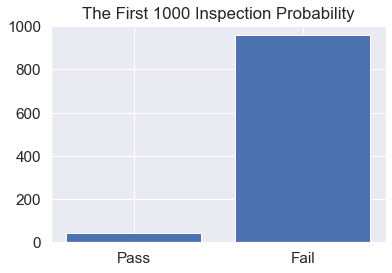

In [51]:
#Plot your distribution of pass/fail among the first 1000 observations in the dataset

plt.bar(["Pass","Fail"],[(y[top1000_risk_prob.id] == 0).sum(),(y[top1000_risk_prob.id] == 1).sum()])
plt.title("The First 1000 Inspection Probability")
plt.show()

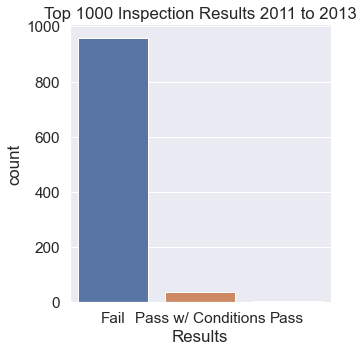

In [52]:
sns.catplot(data = chicago_inspections_2011_to_2013.iloc[top1000_risk_prob.id],
           x = "Results",
           kind = "count")

plt.title("Top 1000 Inspection Results 2011 to 2013")
plt.show()

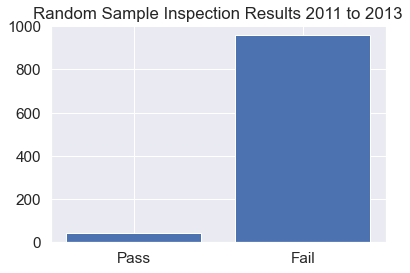

In [53]:
# plot top 1000 inspection results 2011 to 2013
plt.bar(["Pass","Fail"],[(y[top1000_risk_prob.id] == 0).sum(),(y[top1000_risk_prob.id] == 1).sum()])
plt.title("Random Sample Inspection Results 2011 to 2013")
plt.show()   

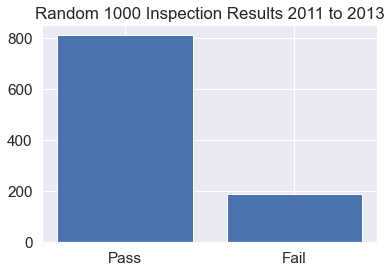

In [54]:
#Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1000 observations at random
random1000=np.random.choice(X.shape[0], 1000)
plt.bar(["Pass","Fail"],[(y[random1000] == 0).sum(),(y[random1000] == 1).sum()])
plt.title("Random 1000 Inspection Results 2011 to 2013")
plt.show()  

As we can see from the above two plots, our decision tree model performs better in detecting violating observations in comparison to random audits. While the decision tree model finds 910 violations, the random audits only detected 190 cases. Results indicated that our decision tree model has better performance. 

### Predict on Data with Unseen Labels

> Indented block



In [55]:
# Fill in the code below with the X data you used for training
X_test = chicago_inspections_2014
X_test['test']=1 

X_test.head()

X_tv = chicago_inspections_2011_to_2013.drop(columns = ['Results'])
X_tv['test']=0
X_tv.head()

X=pd.concat([X_test,X_tv]) 
X.head()

X = pd.get_dummies(X)
X.head()

criticalCount  seriousCount  \
Inspection_ID DBA_Name                                               
920445        SUBWAY                               2             0   
920446        SHARKS FISH & CHICKEN                0             0   
920448        P K PETRO INC.                       0             1   
920449        Z T DOLLAR EXCHANGE,INC              1             2   
920450        KENNEDY FISH & CHICKEN               0             1   

                                       minorCount  pastFail  pastCritical  \
Inspection_ID DBA_Name                                                      
920445        SUBWAY                            0         0             0   
920446        SHARKS FISH & CHICKEN             6         0             0   
920448        P K PETRO INC.                    7         0             0   
920449        Z T DOLLAR EXCHANGE,INC           5         0             0   
920450        KENNEDY FISH & CHICKEN            7         0             0   

                                       pastSerious  pastMinor  timeSinceLast  \
Inspection_ID DBA_Name                                                         
920445        SUBWAY                             0          0       0.794521   
920446        SHARKS FISH & CHICKEN              0          2       0.660274   
920448        P K PETRO INC.                     0          0       2.000000   
920449        Z T DOLLAR EXCHANGE,INC            0          0       2.000000   
920450        KENNEDY FISH & CHICKEN             0          3       0.964384   

                                       firstRecord  POLICE_DISTRICT  \
Inspection_ID DBA_Name                                                
920445        SUBWAY                             0              4.0   
920446        SHARKS FISH & CHICKEN              0              4.0   
920448        P K PETRO INC.                     1              3.0   
920449        Z T DOLLAR EXCHANGE,INC            1              3.0   
920450        KENNEDY FISH & CHICKEN             0              3.0   

                                       ageAtInspection  \
Inspection_ID DBA_Name                                   
920445        SUBWAY                          1.432877   
920446        SHARKS FISH & CHICKEN           9.931507   
920448        P K PETRO INC.                 11.013699   
920449        Z T DOLLAR EXCHANGE,INC         1.408219   
920450        KENNEDY FISH & CHICKEN          3.304110   

                                       consumption_on_premises_incidental_activity  \
Inspection_ID DBA_Name                                                               
920445        SUBWAY                                                             0   
920446        SHARKS FISH & CHICKEN                                              0   
920448        P K PETRO INC.                                                     0   
920449        Z T DOLLAR EXCHANGE,INC                                            0   
920450        KENNEDY FISH & CHICKEN                                             0   

                                       tobacco  package_goods  outdoor_patio  \
Inspection_ID DBA_Name                                                         
920445        SUBWAY                         0              0              0   
920446        SHARKS FISH & CHICKEN          0              0              0   
920448        P K PETRO INC.                 1              0              0   
920449        Z T DOLLAR EXCHANGE,INC        1              0              0   
920450        KENNEDY FISH & CHICKEN         0              0              0   

                                       public_place_of_amusement  \
Inspection_ID DBA_Name                                             
920445        SUBWAY                                           0   
920446        SHARKS FISH & CHICKEN                            0   
920448        P K PETRO INC.                                   0   
920449        Z T DOLLAR EXCHANGE,INC 

In [58]:
# data process of inspections 2011 to 2013 
X_tvnew = X[X.test == 0]
X_tvnew = X_tvnew.drop(columns = ['test'])
X_tvnew.head()

criticalCount  seriousCount  \
Inspection_ID DBA_Name                                                    
269961        SEVEN STAR                                0             0   
507211        PANERA BREAD                              0             0   
507212        LITTLE QUIAPO RESTAURANT                  0             2   
507216        SERGIO'S TAQUERIA PIZZA INC.              0             0   
507219        TARGET STORE # T-2079                     0             2   

                                            minorCount  pastFail  \
Inspection_ID DBA_Name                                             
269961        SEVEN STAR                             2         0   
507211        PANERA BREAD                           3         0   
507212        LITTLE QUIAPO RESTAURANT               6         0   
507216        SERGIO'S TAQUERIA PIZZA INC.           6         0   
507219        TARGET STORE # T-2079                  6         0   

                                            pastCritical  pastSerious  \
Inspection_ID DBA_Name                                                  
269961        SEVEN STAR                               0            0   
507211        PANERA BREAD                             0            0   
507212        LITTLE QUIAPO RESTAURANT                 0            0   
507216        SERGIO'S TAQUERIA PIZZA INC.             0            0   
507219        TARGET STORE # T-2079                    0            0   

                                            pastMinor  timeSinceLast  \
Inspection_ID DBA_Name                                                 
269961        SEVEN STAR                            0            2.0   
507211        PANERA BREAD                          0            2.0   
507212        LITTLE QUIAPO RESTAURANT              0            2.0   
507216        SERGIO'S TAQUERIA PIZZA INC.          0            2.0   
507219        TARGET STORE # T-2079                 0            2.0   

                                            firstRecord  POLICE_DISTRICT  \
Inspection_ID DBA_Name                                                     
269961        SEVEN STAR                              1             19.0   
507211        PANERA BREAD                            1             24.0   
507212        LITTLE QUIAPO RESTAURANT                1             17.0   
507216        SERGIO'S TAQUERIA PIZZA INC.            1             17.0   
507219        TARGET STORE # T-2079                   1             24.0   

                                            ageAtInspection  \
Inspection_ID DBA_Name                                        
269961        SEVEN STAR                          10.964384   
507211        PANERA BREAD                         7.457534   
507212        LITTLE QUIAPO RESTAURANT             4.578082   
507216        SERGIO'S TAQUERIA PIZZA INC.         7.805479   
507219        TARGET STORE # T-2079                5.290411   

                                            consumption_on_premises_incidental_activity  \
Inspection_ID DBA_Name                                                                    
269961        SEVEN STAR                                                              0   
507211        PANERA BREAD                                                            0   
507212        LITTLE QUIAPO RESTAURANT                                                0   
507216        SERGIO'S TAQUERIA PIZZA INC.                                            0   
507219        TARGET STORE # T-2079                                                   0   

                                            tobacco  package_goods  \
Inspection_ID DBA_Name                                               
269961        SEVEN STAR                          1              0   
507211        PANERA BREAD                        0              0   
507212        LITTLE QUIAPO RESTAURANT            0              0   
507216        SERGIO'S TAQUERIA PIZZA INC.        0          

In [59]:
# Data process of inspections 2014
X_test= X[X.test == 1]
X_test = X_test.drop(columns = ['test'])

In [60]:
# Use our best model to predict on inspections 2014
dtree_gscv2.fit(X_tvnew, y)
best_dtree_pred2 = dtree_gscv2.best_estimator_.predict(X_test)
best_dtree_pred2

array([0, 0, 1, ..., 0, 0, 0])

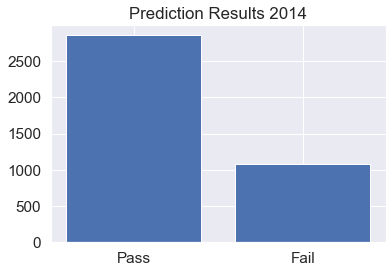

In [61]:
# plotting prediciton results of 2014
plt.bar(["Pass","Fail"],[(best_dtree_pred2== 0).sum(),(best_dtree_pred2 == 1).sum()])
plt.title("Prediction Results 2014")
plt.show() 

In [62]:
# selection of top 1000 observations based on their risk probability. 
risk_prob1 = pd.DataFrame(
    {'id':[i for i in range(X_test.shape[0])],
     'probability': [i[1] for i in dtree_gscv2.predict_proba(X_test)] 
    }
)

risk_prob1 = risk_prob1.sort_values('probability',ascending=False)

top1000_risk_prob1=risk_prob1.iloc[0:1000]

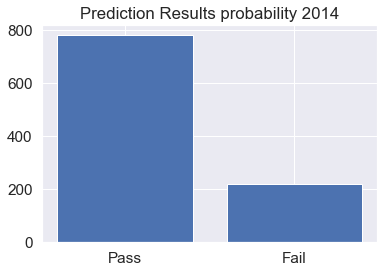

In [63]:
# plot top 1000 inspection results 2014
plt.bar(["Pass","Fail"],[(y[top1000_risk_prob1.id] == 0).sum(),(y[top1000_risk_prob1.id] == 1).sum()])
plt.title("Prediction Results probability 2014")
plt.show()

In [64]:
pd.DataFrame(best_dtree_pred2).to_csv('predictions.csv')  

# (Xueqin) After you make your predictions, choose a metric that you think makes the most sense from a policy perspective and explain your choice. 

We chose F1 as our performance metric from a policy perspective. F1 score refers to the hamonic mean of precision and recall. We chose the F1 score because it works better with the class imbalance problem as shown in this case where pass outnumbers fail. It is also a better choice when we prefer both precision and recall. Precision measures the percentage of true positive among predicted positive. A higher precision score means lower false positive. In our case, when we detect violations, we want to minimalize that we falsely identify those who could pass the inspection as failure. On the other hand, a model with high recall means that lower false negatives among all positive cases. In our model, we also want to minimize the situation that give those observations that fail the inspection a pass. When we would like a model that has both precision and recall, F1 score is a better choice, as it identifies all positive cases but meanwhile indentifies only positive cases. 



# from peter: answers to section 5 questions

1. Accuracy is the ratio of true predictions to all predictions. One reason to think about other metrics in the context of social sciences and public policy is that accuracy might be misleading when classes are imbalanced (when the majority of the labels are in a certain class vs. a small percentage in the other). Another main reason to look beyond accuracy is our priorities/concerns around false positives and false negatives. Precision, for example, is a measure of how well the model is able to weed out false positive predictions (in cases where the cost of mispredicting a false outcome is high), whereas recall is a measure of how well we are able to capture positive outcomes, to be used in cases where the cost of missing a positive outcome is high like the problem we are facing in this exercise. Because the public health cost of not auditing a failing establishment in this case would be high, while auditing a passing establishment is not risky, we are more concerned about false negatives (failure to capture a failing establishment). Hypothetically, if both false positives and false negatives posed almost equal risk or cost in a policy application, we could use F1 as a measure of balance between precision and recall.

2. Ideally, the algorithm should be ‘updated’ with some regularity in order to give a more updated picture about the variables that are important for prediction. In this way, even if an establishment learned of the algorithm and began to change key features, the features would hopefully continue to change, allowing for continued acceptable performance. Algorithms should be dynamic and should reflect the current state of reality. They should not reflect variables important for predicting who should be audited at a static point in time. We would like to note that the point of auditing is to change behavior, though we would like to see a positive change. However, some establishments may change their behavior to evade dectection. If establishments knew that fewer non-restaurants received a fail or pass with conditions rating they may be more apt to change the type establishment they fall under, for example, a cafe that used to serve food and drinks now only serves drinks. Though, argruably, this may not be such an easy adjustment including lost revenue and perhaps not selling food may actually be beneficial to the public's health if the violations were due to food safety. Policy makers could make the algorithm private or only release certian portions of it, though this may raise concerns about transparancy. Policy makers could also prioritize different features each year to make predictions on which establishments they should audit. With different features being prioritized each year could make it harder for establishments to anticipate what they will be audited on, hopefully, pushing them to ensure that all features are up to snuff.

In our case, the features that are found to be correlated with the risk of failing an audit are features that are not easily manipulable without a change in the outcome, so we are not necessarily worried about this manipulation possibility. However, in cases where seemingly irrelevant characteristics such as being located in a particular district, tracing the history of establishment and including them in predictive models might be a way to capture changes that establishments made, enabling their history to also help evaluate their risk.
